In [1]:
import os

def read_pgm(filename):
    """
    Reads a PGM file and returns the image data as a 2D list.
    """
    with open(filename, 'rb') as f:
        # Skip comments
        magic_number = f.readline().strip()
        if magic_number != b'P2':
            raise ValueError("Not a PGM file")
        while True:
            line = f.readline().decode('utf-8').strip()
            if not line.startswith('#'):
                break

        # Read the header
        width, height = map(int, line.split())
        max_val = int(f.readline())

        # Read the image data
        pixel_values = []
        for _ in range(height):
            row = map(int, f.readline().split())
            pixel_values.extend(row)

        return pixel_values

def read_pgm_files_from_folder(folder_path):
    """
    Reads all PGM files from a folder and returns their data as a list of pixel value lists.
    """
    pgm_files_pixel_values = []
    for i, filename in enumerate(os.listdir(folder_path)):
        if filename.endswith('.pgm'):
            file_path = os.path.join(folder_path, filename)
            pixel_values = read_pgm(file_path)
            pgm_files_pixel_values.append(pixel_values)
    return pgm_files_pixel_values

# Example usage:
folder_path = 'sample'
pgm_files_pixel_values = read_pgm_files_from_folder(folder_path)

# Access pixel values using different lists
for i, pixel_values in enumerate(pgm_files_pixel_values):
    locals()[f"pixel_values_{i}"] = pixel_values

# Access pixel values using dynamically created variable names
for i, pixel_values in enumerate(pgm_files_pixel_values):
    print(f"Pixel values from file {i}: {locals()[f'pixel_values_{i}']}")


In [2]:
# Example usage:
folder_path = 'sample_mask'
pgm_files_pixel_values = read_pgm_files_from_folder(folder_path)

# Access pixel values using different lists
for i, pixel_values in enumerate(pgm_files_pixel_values):
    locals()[f"pixel_values_{i}_mask"] = pixel_values

# Access pixel values using dynamically created variable names
for i, pixel_values in enumerate(pgm_files_pixel_values):
    print(f"Pixel values from file {i}: {locals()[f'pixel_values_{i}_mask']}")

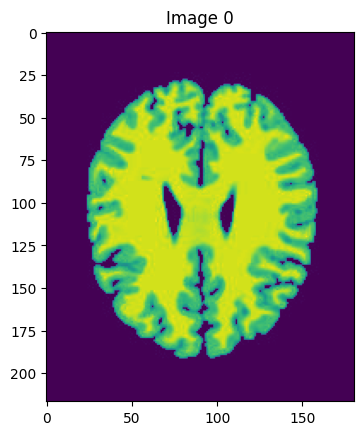

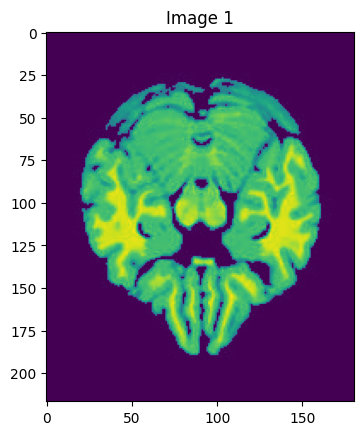

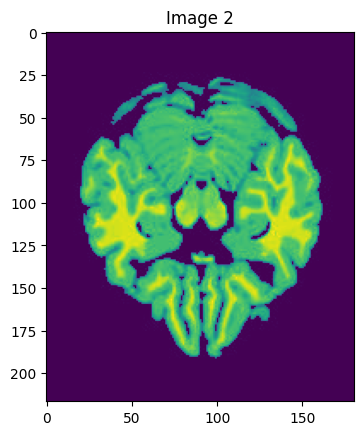

In [4]:
import matplotlib.pyplot as plt

height = 217
width = 181

def convert_to_2d_list(lst, rows, cols):
    if len(lst) != rows * cols:
        raise ValueError("Length of the 1D list does not match the specified dimensions of the 2D list.")
    return [lst[i*cols:(i+1)*cols] for i in range(rows)]

# Assuming you have pixel_values_0, pixel_values_1, ..., pixel_values_4 lists already defined

for i in range(3):
    pixel_values = locals()[f'pixel_values_{i}']
    img = convert_to_2d_list(pixel_values, height, width)
    plt.imshow(img)
    plt.title(f'Image {i}')
    plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:

model = SVC(kernel='rbf')


for t in range(40):
    X_train = []
    k = 0
    for i in range(width):
        for j in range(height):
            rows = []
            rows.append(locals()[f'pixel_values_{t}'][k])
            X_train.append(rows)
            k += 1
            
    y_train = []
    k = 0
    for i in range(width):
        for j in range(height):
            y_train.append(locals()[f'pixel_values_{t}_mask'][k])
            k += 1
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    #X_test_scaled = scaler.transform(X_test)
    
    #Fit the model to the training data
    model.fit(X_train_scaled, y_train)


In [9]:
import joblib
filename='segmentation_model_sample.sav'
joblib.dump(model,filename)

['segmentation_model_sample.sav']

In [27]:
test='Extracted_files/pgm/t1_icbm_normal_1mm_pn0_rf0/slice_92.pgm'
test_mask='Extracted_files/pgm/phantom_1.0mm_normal_crisp/slice_92.pgm'

pixel_values_val = read_pgm(test)
pixel_values_val_mask = read_pgm(test_mask)

In [28]:
X_test=[]

k=0
for i in range(width):
    for j in range(height):
        rows=[]
        rows.append(pixel_values_val[k])
        X_test.append(rows)
        k+=1
        
        
y_test=[]
k=0
for i in range(width):
    for j in range(height):
        y_test.append(pixel_values_val_mask[k])
        k+=1
        
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)
print(y_test)

[[-1.17718478]
 [-1.17718478]
 [-1.17718478]
 ...
 [-1.19351739]
 [-1.19351739]
 [-1.19351739]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [29]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6807037197341956


In [30]:
ori_csf=[]
pred_csf=[]

for i in y_test:
    if(i==1):
        ori_csf.append(255)
    else:
        ori_csf.append(0)

for i in y_pred:
    if(i==1):
        pred_csf.append(255)
    else:
        pred_csf.append(0)

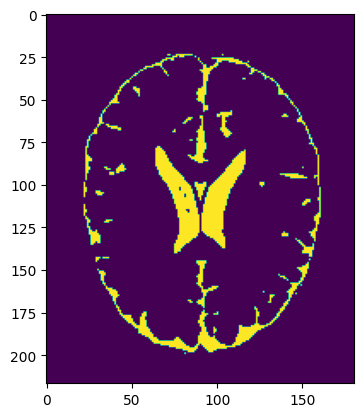

In [34]:
import matplotlib.pyplot as plt

def convert_to_2d_list(lst, rows, cols):
    if len(lst) != rows * cols:
        raise ValueError("Length of the 1D list does not match the specified dimensions of the 2D list.")
    #print(rows)
    #print(cols)
    return [lst[i*cols:(i+1)*cols] for i in range(rows)]

original_csf = convert_to_2d_list(ori_csf, height, width)
plt.imshow(original_csf)

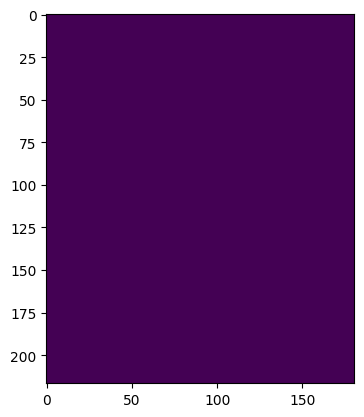

In [35]:
predicted_csf = convert_to_2d_list(pred_csf, height, width)
plt.imshow(predicted_csf)